In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# import tushare as ts
# import QUANTAXIS as QA
import talib as ta
import datetime

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
plt.style.use('ggplot')

In [4]:
import pickle

In [6]:
with open('backtest--001.file', 'rb') as f:
    Account = pickle.load(f)

In [7]:
from stock_util import compute_drawdown, dynamic_max_drawdown, compute_sharpe_ratio, compute_ir

In [8]:
start = '2015-01-01'
end = '2015-12-31'

net_value = Account['net_value']
final_net_value = Account['final_net_value']
profit = Account['profit']
day_profit = Account['day_profit']
positions = Account['positions']

print('累积收益', flush=True)
print(profit, flush=True)
print('单日收益', flush=True)
print(day_profit, flush=True)

# 计算最大回撤
#    drawdown = compute_drawdown(net_value)
drawdown = dynamic_max_drawdown(net_value)
# 计算年化收益和夏普比率
annual_profit, sharpe_ratio = compute_sharpe_ratio(final_net_value, day_profit)
# 计算信息率
ir = compute_ir(day_profit)

print('回测结果 %s - %s，年化收益： %7.3f，最大回撤：%7.3f，夏普比率：%4.2f，信息率：%4.2f' %
      (start, end, annual_profit, drawdown.max(), sharpe_ratio, ir))
#    print(np.sort(list(set(stop_lose_position_date))))
#    print(np.sort(list(set(stop_lose_position_date_current))))
profit.index = pd.DatetimeIndex(profit.index, name = 'date')
positions.index = pd.DatetimeIndex(positions.index, name = 'date')
drawdown.index = pd.DatetimeIndex(positions.index, name = 'date')

累积收益
            net_value   profit   hs300
date                                  
2015-01-05     1.0000   0.0000  0.0000
2015-01-06     1.0000   0.0000 -0.0132
2015-01-07     1.0000   0.0000  0.0618
2015-01-08     1.0000   0.0000 -2.2595
2015-01-09     1.0000   0.0000 -2.6038
2015-01-12     1.0000   0.0000 -3.5139
2015-01-13     1.0000   0.0000 -3.5013
2015-01-14     1.0000   0.0000 -3.8204
2015-01-15     1.0000   0.0000 -1.0276
2015-01-16     1.0000   0.0000 -0.1755
2015-01-19     1.0000   0.0000 -7.8643
2015-01-20     1.0000   0.0000 -6.7367
2015-01-21     1.0052   0.5159 -2.5443
2015-01-22     1.0110   1.0992 -2.0302
2015-01-23     1.0057   0.5711 -1.9170
2015-01-26     1.0205   2.0489 -0.9213
2015-01-27     1.0142   1.4211 -1.8292
2015-01-28     1.0077   0.7689 -3.1915
2015-01-29     0.9987  -0.1285 -4.3866
2015-01-30     0.9901  -0.9906 -5.6885
2015-02-02     0.9779  -2.2120 -7.8972
2015-02-03     0.9811  -1.8905 -5.6045
2015-02-04     0.9799  -2.0079 -6.5843
2015-02-05     0.975

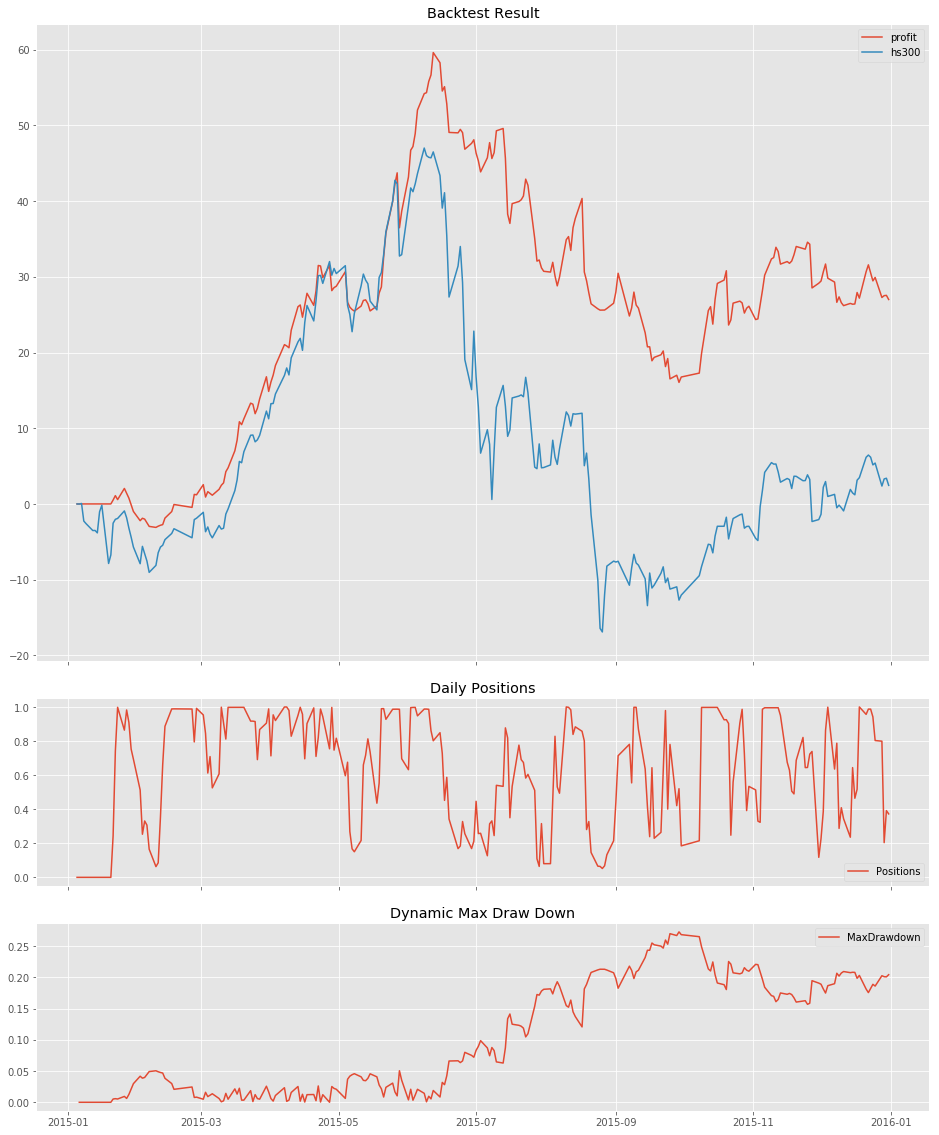

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(16,20))

axes[0] = plt.subplot2grid((5,3), (0,0), colspan=3, rowspan=3)
axes[0].plot(profit.loc[:,['profit', 'hs300']])
plt.setp(axes[0].get_xticklabels(), visible=False)
axes[0].set(title='Backtest Result')
axes[0].legend(['profit', 'hs300'], loc='best')

axes[1] = plt.subplot2grid((5,3), (3,0), colspan=3, sharex=axes[0])
axes[1].plot(positions)
plt.setp(axes[1].get_xticklabels(), visible=False)
axes[1].set_title('Daily Positions')
axes[1].legend(['Positions'], loc='best')

axes[2] = plt.subplot2grid((5,3), (4,0), colspan=3, sharex=axes[0])
axes[2].plot(drawdown)
axes[2].set_title('Dynamic Max Draw Down')
axes[2].legend(['MaxDrawdown'], loc='best');

In [10]:
history_table = Account['history_table']

In [12]:
history_table

,datetime,code,price,amount,cash
1,2015-01-21,000926,10.56,18900,9800416.00
2,2015-01-21,002546,13.37,14900,9601203.00
3,2015-01-21,002696,12.08,16500,9401883.00
4,2015-01-21,300040,8.44,23600,9202699.00
5,2015-01-21,300214,5.63,35500,9002834.00
6,2015-01-21,300360,23.60,8400,8804594.00
7,2015-01-21,600067,7.47,26700,8605145.00
8,2015-01-21,600070,8.45,23600,8405725.00
9,2015-01-21,600230,12.32,16200,8206141.00
10,2015-01-21,600421,7.33,27200,8006765.00
